# FGM Web Scraping - Topic Modeling with 2019 News
## Country: Kenya

### Newspaper: The Star
* Scraped Date (URLs): 2019-11-25

## Scrape News Contents
* Scraped Date (Contents): 2019-12-03

In [1]:
# Install dependencies
import requests
from bs4 import BeautifulSoup
from splinter import Browser
import pandas as pd
import numpy as np
import time

In [2]:
# Install and initiate Chromedriver (https://splinter.readthedocs.io/en/latest/drivers/chrome.html)
!which chromedriver

/usr/local/bin/chromedriver


In [3]:
# Import scraped URLs for 2019 
df = pd.read_csv('../Scraped/kenya_star/kenya_star_V20191125_2019.csv')
df.head()

,Country,Newspaper,Terminology,NewsUrls,NewsTitles,Year
0,Kenya,The Star,FGM,https://www.the-star.co.ke/news/africa/2019-06...,Uhuru pledges to end FGM by 2022,2019
1,Kenya,The Star,FGM,https://www.the-star.co.ke/news/2019-10-23-myt...,Myths used to force women and girls into FGM,2019
2,Kenya,The Star,FGM,https://www.the-star.co.ke/counties/coast/2019...,Maasai elders and youths fight FGM in Taita Ta...,2019
3,Kenya,The Star,FGM,https://www.the-star.co.ke/news/2019-06-21-sur...,"Survivor, Masai elder to testify in case to le...",2019
4,Kenya,The Star,FGM,https://www.the-star.co.ke/opinion/columnists/...,Let’s accelerate efforts towards ending FGM,2019


In [4]:
# Drop unnecessary columns 
df1 = df.drop(columns=['Country', 'Newspaper', 'Terminology', 'NewsTitles', 'Year'])
df1.head()

,NewsUrls
0,https://www.the-star.co.ke/news/africa/2019-06...
1,https://www.the-star.co.ke/news/2019-10-23-myt...
2,https://www.the-star.co.ke/counties/coast/2019...
3,https://www.the-star.co.ke/news/2019-06-21-sur...
4,https://www.the-star.co.ke/opinion/columnists/...


In [5]:
# Check the number of rows in dataframe
len(df1)

166

In [6]:
# Convert dataframe into a single list
news_urls = df1.values.flatten()
print(news_urls)

['https://www.the-star.co.ke/news/africa/2019-06-04-kenya-president-pledges-to-end-fgm/'
 'https://www.the-star.co.ke/news/2019-10-23-myths-used-to-force-women-and-girls-into-fgm/'
 'https://www.the-star.co.ke/counties/coast/2019-08-30-maasai-elders-and-youths-fight-fgm-in-taita-taveta/'
 'https://www.the-star.co.ke/news/2019-06-21-survivor-masai-elder-to-testify-in-case-to-legalise-fgm/'
 'https://www.the-star.co.ke/opinion/columnists/2019-10-17-lets-accelerate-efforts-towards-ending-fgm/'
 'https://www.the-star.co.ke/news/2019-09-07-court-jails-five-meru-fgm-victims-3-years/'
 'https://www.the-star.co.ke/news/2019-04-18-east-african-ministers-sign-deal-to-end-cross-border-fgm/'
 'https://www.the-star.co.ke/counties/eastern/2019-04-10-fgm-rife-in-meru-despite-ban/'
 'https://www.the-star.co.ke/news/2019-03-11-women-to-pay-sh200000-or-do-time-for-procuring-fgm/'
 'https://www.the-star.co.ke/news/2019-11-07-elders-to-lead-anti-fgm-campaigns-in-hotspot-counties/'
 'https://www.the-star.c

In [7]:
# Execute path with Chrome browser 
executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)


# Retrieve news contents
news_contents = []

for urls in news_urls: 
    #print(urls)
    browser.visit(urls)
    time.sleep(3)
    soup = BeautifulSoup(browser.html, 'html.parser')
    
    for contents in soup.find_all('div', class_='text'):
        news_contents.append(contents.text)
        
print(news_contents)

[' Kenya\'s President Uhuru Kenyatta has said he wants to see an end to Female Genital Mutilation by the end of his time in power in 2022.\nHe was speaking to the Women Deliver conference in Vancouver, Canada, and his official Twitter account quotes him as saying that he hopes "to put an end" to FGM:AdChoicesADVERTISINGinRead invented by Teads\nFGM has been against the law in Kenya since 2011 but the practice continues.\nCampaign group 28 Too Many\xa0says that one in five Kenyan women between the ages of 15 and 49 have undergone FGM but the numbers are falling.\nThe president did not outline how reducing the rate to zero will be achieved.\nMr Kenyatta also pledged to help make Kenya are more equal society when it comes to the treatment of women.\n"We need to make the society understand that women are as capable as men. We have to create an enabling environment and the opportunity for them to serve," his Twitter account quotes him as saying. ', ' Ancestral curses, bad omens in the famil

In [10]:
# Convert list into dataframe and remove empty string rows
df_contents = pd.DataFrame(news_contents, columns=['NewsContents'])
df_contents1 = df_contents.replace('', np.NaN).dropna(how='all')
df_contents1 = df_contents1.replace(' ', np.NaN).dropna(how='all')
df_contents1.head()

,NewsContents
0,Kenya's President Uhuru Kenyatta has said he ...
1,"Ancestral curses, bad omens in the family, de..."
2,A two-front campaign made up of Maasai elders...
3,"A survivor, a Masai elder and an expert will ..."
6,A court in Meru has sentenced five victims of...


In [11]:
# Reset the index of dataframe
df_contents1 = df_contents1.reset_index(drop=True)
df_contents1.head()

,NewsContents
0,Kenya's President Uhuru Kenyatta has said he ...
1,"Ancestral curses, bad omens in the family, de..."
2,A two-front campaign made up of Maasai elders...
3,"A survivor, a Masai elder and an expert will ..."
4,A court in Meru has sentenced five victims of...


In [12]:
# Check the number of rows in dataframe
len(df_contents1)

210

In [13]:
# Export into CSV file
df_contents1.to_csv('../Scraped/kenya_star/kenya_star_V20191203_contents.csv')

## Text Mining - Topic Modeling
* Reference: Topic Modeling (https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)
* Using Latent Dirichlet Allocation (LDA) & Mallet's implementation via Gensim package

In [21]:
# Import cleaned scraped news contents for 2019 (This is to prevent scraping everytime when running models)
df_contents2 = pd.read_csv('../Scraped/kenya_star/kenya_star_V20191203_contents_cleaned.csv', encoding = "ISO-8859-1")
df_contents2.head()

,NewsContents
0,Kenya's President Uhuru Kenyatta has said he ...
1,"Ancestral curses, bad omens in the family, de..."
2,A two-front campaign made up of Maasai elders...
3,"A survivor, a Masai elder and an expert will ..."
4,A court in Meru has sentenced five victims of...


In [22]:
# Install dependencies
import re
import numpy as np
import pandas as pd
from pprint import pprint ## Package to print data pretty! 

# Gensim (Python library for Topic Modeling)
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Spacy for lemmatization (Python library for NLP)
import spacy

# Plotting tools 
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
# %matplotlib inline

# Enable logging for Gensim - Optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

### Prepare Stopwords

In [23]:
# Prepare NLTK Stopwords for data preprocessing
from nltk.corpus import stopwords

stop_words = stopwords.words('english') # Select language to be used (e.g. english)
#stop_words.extend(['from', 'subject', 're', 'edu', 'use']) # You can include more words

In [24]:
# Convert dataframe into list
data = df_contents2.values.tolist()
#print(data)

pprint(data[:1]) ## Q. Why some of them have double quotes?

[[" Kenya's President Uhuru Kenyatta has said he wants to see an end to Female "
  'Genital Mutilation by the end of his time in power in 2022.\n'
  'He was speaking to the Women Deliver conference in Vancouver, Canada, and '
  'his official Twitter account quotes him as saying that he hopes "to put an '
  'end" to FGM:AdChoicesADVERTISINGinRead invented by Teads\n'
  'FGM has been against the law in Kenya since 2011 but the practice '
  'continues.\n'
  'Campaign group 28 Too Manysays that one in five Kenyan women between the '
  'ages of 15 and 49 have undergone FGM but the numbers are falling.\n'
  'The president did not outline how reducing the rate to zero will be '
  'achieved.\n'
  'Mr Kenyatta also pledged to help make Kenya are more equal society when it '
  'comes to the treatment of women.\n'
  '"We need to make the society understand that women are as capable as men. '
  'We have to create an enabling environment and the opportunity for them to '
  'serve," his Twitter acco

### Tokenize Words and Clean-up Text

In [25]:
# Tokenize words (each sentence into a list of words) and clean-up text 
def sent_to_words(sentences): 
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) # deacc=True removes punctuations
        
data_words = list(sent_to_words(data))

print(data_words[:1]) # Q. What is [:1] doing? it works without this

[['kenya', 'president', 'uhuru', 'kenyatta', 'has', 'said', 'he', 'wants', 'to', 'see', 'an', 'end', 'to', 'female', 'genital', 'mutilation', 'by', 'the', 'end', 'of', 'his', 'time', 'in', 'power', 'in', 'nhe', 'was', 'speaking', 'to', 'the', 'women', 'deliver', 'conference', 'in', 'vancouver', 'canada', 'and', 'his', 'official', 'twitter', 'account', 'quotes', 'him', 'as', 'saying', 'that', 'he', 'hopes', 'to', 'put', 'an', 'end', 'to', 'fgm', 'invented', 'by', 'teads', 'nfgm', 'has', 'been', 'against', 'the', 'law', 'in', 'kenya', 'since', 'but', 'the', 'practice', 'continues', 'ncampaign', 'group', 'too', 'manysays', 'that', 'one', 'in', 'five', 'kenyan', 'women', 'between', 'the', 'ages', 'of', 'and', 'have', 'undergone', 'fgm', 'but', 'the', 'numbers', 'are', 'falling', 'nthe', 'president', 'did', 'not', 'outline', 'how', 'reducing', 'the', 'rate', 'to', 'zero', 'will', 'be', 'achieved', 'nmr', 'kenyatta', 'also', 'pledged', 'to', 'help', 'make', 'kenya', 'are', 'more', 'equal', '

### Creating Bigram and Trigram Models

In [26]:
# Build Bigram (i.e. Two words frequently occurring together in the document) and Trigram (i.e. Three words frequently occuring) Models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Higher threshold fewer phrases
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['kenya', 'president_uhuru_kenyatta', 'has', 'said', 'he', 'wants', 'to', 'see', 'an', 'end', 'to', 'female_genital_mutilation', 'by', 'the', 'end', 'of', 'his', 'time', 'in', 'power', 'in', 'nhe', 'was', 'speaking', 'to', 'the', 'women', 'deliver', 'conference', 'in', 'vancouver', 'canada', 'and', 'his', 'official', 'twitter', 'account', 'quotes', 'him', 'as', 'saying', 'that', 'he', 'hopes', 'to', 'put', 'an', 'end', 'to', 'fgm', 'invented', 'by', 'teads', 'nfgm', 'has', 'been', 'against', 'the', 'law', 'in', 'kenya', 'since', 'but', 'the', 'practice', 'continues', 'ncampaign', 'group', 'too', 'manysays', 'that', 'one', 'in', 'five', 'kenyan', 'women', 'between', 'the', 'ages', 'of', 'and', 'have', 'undergone', 'fgm', 'but', 'the', 'numbers', 'are', 'falling', 'nthe', 'president', 'did', 'not', 'outline', 'how', 'reducing', 'the', 'rate', 'to', 'zero', 'will', 'be', 'achieved', 'nmr', 'kenyatta', 'also', 'pledged', 'to', 'help', 'make', 'kenya', 'are', 'more', 'equal', 'society', 'wh

### Remove Stopwords, Make Bigrams and Lemmatize

In [27]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [28]:
# Call the functions in order
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['say', 'want', 'end', 'female_genital', 'mutilation', 'end', 'time', 'speak', 'woman', 'deliver', 'account', 'quote', 'say', 'hope', 'put', 'end', 'fgm', 'invent', 'tead', 'nfgm', 'law', 'kenya', 'practice', 'continue', 'group', 'manysay', 'kenyan', 'woman', 'age', 'undergo', 'fgm', 'number', 'fall', 'nthe', 'president', 'outline', 'reduce', 'rate', 'achieve', 'also', 'pledge', 'help', 'make', 'equal', 'society', 'come', 'treatment', 'woman', 'need', 'make', 'society', 'understand', 'woman', 'capable', 'man', 'create', 'enable', 'environment', 'opportunity', 'serve', 'twitter', 'account', 'quote', 'say']]


### Create the Dictionary and Corpus needed for Topic Modeling

In [29]:
# The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1]) # Gensim creates a unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency).

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 3), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 4)]]


In [30]:
# To see what word a given id corresponds to, pass the id as a key to the dictionary
id2word[0]

'account'

In [31]:
# Or, you can see a human-readable form of the corpus itself
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('account', 2),
  ('achieve', 1),
  ('age', 1),
  ('also', 1),
  ('capable', 1),
  ('come', 1),
  ('continue', 1),
  ('create', 1),
  ('deliver', 1),
  ('enable', 1),
  ('end', 3),
  ('environment', 1),
  ('equal', 1),
  ('fall', 1),
  ('female_genital', 1),
  ('fgm', 2),
  ('group', 1),
  ('help', 1),
  ('hope', 1),
  ('invent', 1),
  ('kenya', 1),
  ('kenyan', 1),
  ('law', 1),
  ('make', 2),
  ('man', 1),
  ('manysay', 1),
  ('mutilation', 1),
  ('need', 1),
  ('nfgm', 1),
  ('nthe', 1),
  ('number', 1),
  ('opportunity', 1),
  ('outline', 1),
  ('pledge', 1),
  ('practice', 1),
  ('president', 1),
  ('put', 1),
  ('quote', 2),
  ('rate', 1),
  ('reduce', 1),
  ('say', 3),
  ('serve', 1),
  ('society', 2),
  ('speak', 1),
  ('tead', 1),
  ('time', 1),
  ('treatment', 1),
  ('twitter', 1),
  ('undergo', 1),
  ('understand', 1),
  ('want', 1),
  ('woman', 4)]]

### Building the Topic Model

In [32]:
# Build LDA Model (Latent Dirichlet Allocation)
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

### View the Topics in LDA Model

In [33]:
# Print the Keyword in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.014*"country" + 0.011*"young" + 0.011*"work" + 0.010*"people" + '
  '0.009*"say" + 0.009*"kenyan" + 0.009*"need" + 0.008*"offer" + '
  '0.008*"university" + 0.008*"job"'),
 (1,
  '0.018*"government" + 0.017*"faith" + 0.014*"information" + 0.014*"woman" + '
  '0.013*"service" + 0.013*"say" + 0.011*"policy" + 0.010*"church" + '
  '0.010*"access" + 0.009*"person"'),
 (2,
  '0.032*"say" + 0.025*"meeting" + 0.022*"go" + 0.015*"claim" + 0.013*"take" + '
  '0.012*"tell" + 0.010*"audio" + 0.010*"referendum" + 0.009*"also" + '
  '0.009*"meet"'),
 (3,
  '0.018*"land" + 0.011*"country" + 0.010*"category" + 0.009*"mission" + '
  '0.009*"say" + 0.009*"statement" + 0.009*"belgian" + 0.007*"faith" + '
  '0.007*"loan" + 0.007*"represent"'),
 (4,
  '0.034*"say" + 0.018*"girl" + 0.014*"woman" + 0.009*"child" + 0.008*"school" '
  '+ 0.006*"also" + 0.006*"community" + 0.006*"government" + 0.006*"practice" '
  '+ 0.006*"man"')]


### Compute Model Perplexity and Coherence Score
* Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is

In [34]:
# Compute Perplexity
print('Perplexity: ', lda_model.log_perplexity(corpus)) # A measure of how good the model is. Lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Perplexity:  -7.741809466418567
Coherence Score:  0.3793590358035702


### Visualize the Topics-Keywords
* To examine the produced topics and the associated keywords

In [35]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/Users/csfsunmin/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.026227 -0.030095       1        1  77.120842
3     -0.085696  0.120297       2        1   8.722330
2      0.284202  0.021859       3        1   6.518248
0     -0.069625 -0.248151       4        1   5.069220
1     -0.102654  0.136090       5        1   2.569360, topic_info=     Category        Freq          Term       Total  loglift  logprob
40    Default  957.000000           say  957.000000  30.0000  30.0000
51    Default  354.000000         woman  354.000000  29.0000  29.0000
198   Default  204.000000    government  204.000000  28.0000  28.0000
65    Default  229.000000         child  229.000000  27.0000  27.0000
503   Default  115.000000            go  115.000000  26.0000  26.0000
209   Default  120.000000        people  120.000000  25.0000  25.0000
218   Default  127.000000          take  127.000000  24.0000  24.0000
169   Default   96.000000         young   96.000000  23.0000  23.0000
72    Default  126.000000       country  126.000000  22.0000  22.0000
24    Default  159.000000           man  159.000000  21.0000  21.0000
402   Default   78.000000          call   78.000000  20.0000  20.0000
581   Default   74.000000         faith   74.000000  19.0000  19.0000
1002  Default   79.000000       provide   79.000000  18.0000  18.0000
749   Default   73.000000         actor   73.000000  17.0000  17.0000
459   Default   71.000000          urge   71.000000  16.0000  16.0000
380   Default   59.000000       meeting   59.000000  15.0000  15.0000
3     Default  195.000000          also  195.000000  14.0000  14.0000
580   Default   59.000000          care   59.000000  13.0000  13.0000
181   Default  155.000000     community  155.000000  12.0000  12.0000
98    Default  114.000000        health  114.000000  11.0000  11.0000
155   Default   92.000000          tell   92.000000  10.0000  10.0000
150   Default   89.000000        sexual   89.000000   9.0000   9.0000
463   Default   74.000000          work   74.000000   8.0000   8.0000
27    Default   88.000000          need   88.000000   7.0000   7.0000
522   Default  107.000000          many  107.000000   6.0000   6.0000
992   Default   51.000000          land   51.000000   5.0000   5.0000
637   Default   41.000000        policy   41.000000   4.0000   4.0000
460   Default   66.000000      violence   66.000000   3.0000   3.0000
355   Default   38.000000       service   38.000000   2.0000   2.0000
415   Default   68.000000        ensure   68.000000   1.0000   1.0000
...       ...         ...           ...         ...      ...      ...
1751   Topic5    3.422029       locally    6.359231   3.0418  -5.4764
710    Topic5   11.716962   information   24.056393   2.9422  -4.2456
130    Topic5    6.996775  particularly   14.762851   2.9148  -4.7611
1371   Topic5    7.943236        church   22.938725   2.6010  -4.6343
355    Topic5   11.018024       service   38.919121   2.3996  -4.3071
581    Topic5   13.717051         faith   74.697029   1.9667  -4.0879
637    Topic5    9.319977        policy   41.694439   2.1633  -4.4744
1164   Topic5    7.839112        access   33.629059   2.2052  -4.6475
343    Topic5    7.594544        person   32.709740   2.2013  -4.6792
198    Topic5   14.625773    government  204.186279   1.0253  -4.0238
616    Topic5    7.145148   development   55.937630   1.6037  -4.7402
580    Topic5    7.102036          care   59.440815   1.5369  -4.7462
51     Topic5   11.071712         woman  354.113495   0.1963  -4.3022
1002   Topic5    7.302257       provide   79.973366   1.2680  -4.7184
749    Topic5    6.957996         actor   73.571747   1.3031  -4.7667
459    Topic5    6.837096          urge   71.249641   1.3177  -4.7842
402    Topic5    6.942306          call   78.467529   1.2365  -4.7690
209    Topic5    7.325228        people  120.557487   0.8607  -4.7153
40     Topic5   10.783388           say  957.237732  -0.8245  -4.3286
65     To

### Building LDA Mallet Model

In [36]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = '/Users/csfsunmin/mallet-2.0.8/bin/mallet' # Update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=5, id2word=id2word)

In [37]:
# Show topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('case', 0.017346549752192145),
   ('invent', 0.015630956919557758),
   ('family', 0.015059092642012962),
   ('time', 0.012390392680137247),
   ('region', 0.011627906976744186),
   ('police', 0.011437285550895921),
   ('good', 0.01067479984750286),
   ('find', 0.010293556995806329),
   ('report', 0.009912314144109797),
   ('place', 0.008959207014868471)]),
 (1,
  [('woman', 0.063881636205396),
   ('girl', 0.05657093124456049),
   ('practice', 0.03185378590078329),
   ('man', 0.031157528285465624),
   ('fgm', 0.03080939947780679),
   ('mutilation', 0.020365535248041775),
   ('cut', 0.020017406440382943),
   ('community', 0.016884247171453436),
   ('age', 0.014795474325500435),
   ('female_genital', 0.012358572671888599)]),
 (2,
  [('child', 0.04056246619794483),
   ('school', 0.034793582116459346),
   ('girl', 0.0319091400757166),
   ('parent', 0.017306652244456464),
   ('education', 0.017306652244456464),
   ('county', 0.014782765458806562),
   ('year', 0.014602487831260141),
 

### Find the Optimal Number of Topics for LDA

In [38]:
# Finding the optimal number of topics for LDA 
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [39]:
# Can take a long time to run
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

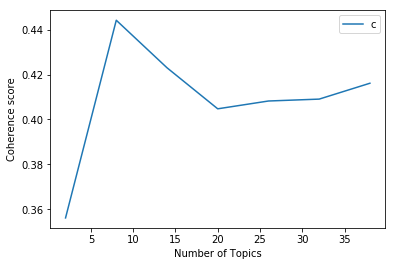

In [40]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence score')
plt.legend(('coherence_values'), loc='best')
plt.show()

In [43]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print('Num Topics =', m, ' has Coherence Value of', round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3562
Num Topics = 8  has Coherence Value of 0.4442
Num Topics = 14  has Coherence Value of 0.423
Num Topics = 20  has Coherence Value of 0.4048
Num Topics = 26  has Coherence Value of 0.4082
Num Topics = 32  has Coherence Value of 0.4091
Num Topics = 38  has Coherence Value of 0.4161


In [44]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.085*"girl" + 0.064*"child" + 0.055*"school" + 0.038*"education" + '
  '0.027*"parent" + 0.018*"year" + 0.012*"teacher" + 0.012*"water" + '
  '0.012*"ensure" + 0.012*"due"'),
 (1,
  '0.077*"woman" + 0.053*"girl" + 0.046*"fgm" + 0.036*"practice" + '
  '0.029*"community" + 0.028*"cut" + 0.024*"mutilation" + 0.020*"law" + '
  '0.020*"man" + 0.018*"undergo"'),
 (2,
  '0.028*"time" + 0.025*"family" + 0.024*"case" + 0.022*"man" + 0.020*"nthe" + '
  '0.015*"invent" + 0.015*"marriage" + 0.015*"leave" + 0.015*"mother" + '
  '0.012*"good"'),
 (3,
  '0.023*"government" + 0.019*"call" + 0.018*"police" + 0.018*"region" + '
  '0.016*"officer" + 0.015*"find" + 0.014*"arrest" + 0.014*"fight" + '
  '0.013*"people" + 0.012*"daughter"'),
 (4,
  '0.032*"health" + 0.025*"age" + 0.024*"high" + 0.023*"sexual" + 0.017*"year" '
  '+ 0.017*"county" + 0.015*"report" + 0.015*"reduce" + 0.013*"live" + '
  '0.013*"pregnant"'),
 (5,
  '0.029*"land" + 0.018*"make" + 0.015*"public" + 0.014*"government" + '
  

### Finding the Dominant Topic in Each Sentence

In [45]:
# Finding the dominant topic in each sentence
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.2246,"woman, end, make, violence, government, policy...",[ Kenya's President Uhuru Kenyatta has said he...
1,1,1.0,0.4108,"woman, girl, fgm, practice, community, cut, mu...","[ Ancestral curses, bad omens in the family, d..."
2,2,1.0,0.2962,"woman, girl, fgm, practice, community, cut, mu...",[ A two-front campaign made up of Maasai elder...
3,3,1.0,0.2463,"woman, girl, fgm, practice, community, cut, mu...","[ A survivor, a Masai elder and an expert will..."
4,4,1.0,0.2500,"woman, girl, fgm, practice, community, cut, mu...",[ A court in Meru has sentenced five victims o...
5,5,1.0,0.1862,"woman, girl, fgm, practice, community, cut, mu...",[ Gender CS Margaret Kobia yesterday led her c...
6,6,6.0,0.2482,"woman, end, make, violence, government, policy...",[ The study further indicated that Kenya is th...
7,7,1.0,0.3159,"woman, girl, fgm, practice, community, cut, mu...",[ Chiefs and their assistants in Meru are alle...
8,8,3.0,0.1598,"government, call, police, region, officer, fin...",[ Two women found guilty of procuring the serv...
9,9,1.0,0.1884,"woman, girl, fgm, practice, community, cut, mu...",[ Elders from 22 FGM hotspot counties have com...


### Find the Most Representative Document for Each Topic

In [46]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.6101,"girl, child, school, education, parent, year, ...",[ Lack of water for personal hygiene is keepin...
1,1.0,0.5209,"woman, girl, fgm, practice, community, cut, mu...",[ Two men in Kenya are rallying against the my...
2,2.0,0.4502,"time, family, case, man, nthe, invent, marriag...",[ The other day someone sent me a link to a st...
3,3.0,0.5901,"government, call, police, region, officer, fin...",[ Mandera elders are in Somalia to negotiate w...
4,4.0,0.5733,"health, age, high, sexual, year, county, repor...","[ Anne Adhiambo, 36, from Othoro village in Ka..."


### Topic Distribution across Documents

In [47]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,6.0,"woman, end, make, violence, government, policy...",36.0,0.1739
1,1.0,"woman, girl, fgm, practice, community, cut, mu...",30.0,0.1449
2,1.0,"woman, girl, fgm, practice, community, cut, mu...",26.0,0.1256
3,1.0,"woman, girl, fgm, practice, community, cut, mu...",19.0,0.0918
4,1.0,"woman, girl, fgm, practice, community, cut, mu...",23.0,0.1111
5,1.0,"woman, girl, fgm, practice, community, cut, mu...",16.0,0.0773
6,6.0,"woman, end, make, violence, government, policy...",35.0,0.1691
7,1.0,"woman, girl, fgm, practice, community, cut, mu...",22.0,0.1063
8,3.0,"government, call, police, region, officer, fin...",NaN,NaN
9,1.0,"woman, girl, fgm, practice, community, cut, mu...",NaN,NaN
